In [15]:
import pandas as pd
import numpy as np

import datetime
from datetime import date

import mpl_toolkits
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import folium

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading data ranging from 1800 to present

In [16]:
quake = pd.read_csv('https://raw.githubusercontent.com/labs13-quake-viewer/ds-data/master/earthquake_1800_present.csv')
quake.shape

(7966, 22)

In [17]:
quake.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2019-06-23T03:53:02.890Z,40.273500,-124.300333,9.44,5.58,mw,34.0,159.00,0.031160,0.1700,...,2019-06-24T07:17:57.226Z,"6km SSW of Petrolia, CA",earthquake,0.34,0.21,NaN,6.0,reviewed,nc,nc
1,2019-06-22T08:50:24.926Z,39.219000,-99.430800,3.00,4.50,mwr,NaN,46.00,0.469000,0.5100,...,2019-06-24T08:05:53.985Z,"11km W of Plainville, Kansas",earthquake,3.50,2.00,0.046,46.0,reviewed,us,us
2,2019-06-13T20:52:42.458Z,30.699500,-114.142000,10.00,4.40,mb,NaN,179.00,0.696000,1.3700,...,2019-06-19T10:26:24.357Z,"76km ESE of San Felipe, Mexico",earthquake,3.40,2.00,0.120,20.0,reviewed,us,us
3,2019-06-11T07:46:25.470Z,38.813667,-122.823333,1.97,4.07,mw,78.0,20.00,0.006619,0.0600,...,2019-06-16T22:27:30.485Z,"7km NW of The Geysers, CA",earthquake,0.09,0.12,NaN,7.0,reviewed,nc,nc
4,2019-06-11T07:24:20.720Z,37.469600,-116.695600,15.90,4.10,ml,56.0,34.09,0.271000,0.2249,...,2019-06-12T23:41:49.906Z,"54km ESE of Goldfield, Nevada",earthquake,NaN,0.90,0.210,14.0,reviewed,nn,nn


### Keeping only the columns required for analysis

In [18]:
df = quake[["time","latitude","longitude","mag","depth","type"]]

In [19]:
df.tail()

,time,latitude,longitude,mag,depth,type
7961,1811-12-16T14:15:00.000Z,35.6,-90.4,7.0,NaN,earthquake
7962,1811-12-16T08:15:00.000Z,35.6,-90.4,7.7,NaN,earthquake
7963,1808-06-21T00:00:00.000Z,37.8,-122.5,6.0,NaN,earthquake
7964,1804-08-20T20:10:00.000Z,42.0,-87.8,4.4,NaN,earthquake
7965,1800-11-22T21:30:00.000Z,33.0,-117.3,6.5,NaN,earthquake


In [20]:
df.dtypes

time          object
latitude     float64
longitude    float64
mag          float64
depth        float64
type          object
dtype: object

In [21]:
# Converting time column to datetime
df['time'] = pd.to_datetime(df['time'], format = "%m/%d/%y",infer_datetime_format=True)

# Extracting date and year
df['date'] = df['time'].dt.date

# Dropping unwanted columns
df = df.drop(['time'], axis='columns')

In [22]:
df.head()

,latitude,longitude,mag,depth,type,date
0,40.273500,-124.300333,5.58,9.44,earthquake,2019-06-23
1,39.219000,-99.430800,4.50,3.00,earthquake,2019-06-22
2,30.699500,-114.142000,4.40,10.00,earthquake,2019-06-13
3,38.813667,-122.823333,4.07,1.97,earthquake,2019-06-11
4,37.469600,-116.695600,4.10,15.90,earthquake,2019-06-11


In [23]:
# Using pivot table to see extract details from the dataset

print(df.pivot_table(index = 'type', values = 'mag', aggfunc=len))

                      mag
type                     
earthquake         7517.0
explosion             9.0
mine collapse        10.0
nuclear explosion   405.0
other event           7.0
quarry blast         12.0
rock burst            4.0
sonic boom            2.0


## Basemap showing affected areas in US and neighbouring regions from 1800 to present date

In [17]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,resolution='c')

In [18]:
# Basemap object converts lon/lat (in degrees) to x/y map projection coordinates.

longitudes = df['longitude'].tolist()
latitudes = df['latitude'].tolist()
x,y = m(longitudes,latitudes)

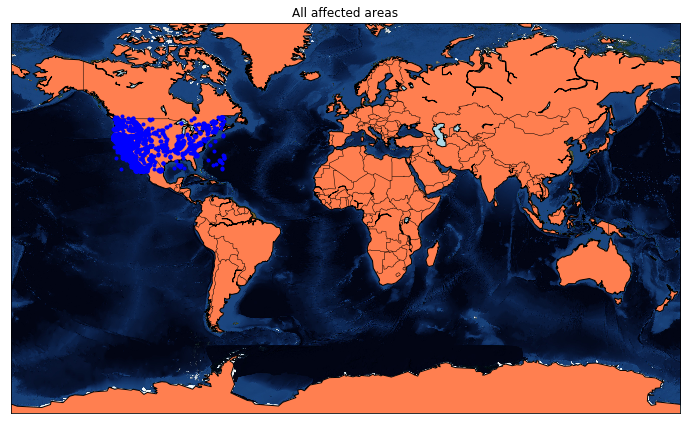

In [19]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 3, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='lightblue')
m.drawcountries()
m.bluemarble()
plt.show()


# fig = plt.figure(figsize=(8, 8))
# m = Basemap(projection='ortho', resolution=None,
#             lat_0=50, lon_0=0)
# draw_map(m);

In [187]:
# for printing the country-name labels

# class MyBasemap(Basemap):     
#     def printcountries(self, d=3, max_len=12):
#         data = pd.io.parsers.read_csv("http://opengeocode.org/cude/download.php?file=/home/fashions/public_html/opengeocode.org/download/cow.txt", 
#                                       sep=";", skiprows=28 )
#         data = data[(data.latitude > self.llcrnrlat+d) & (data.latitude < self.urcrnrlat-d) & (data.longitude > self.llcrnrlon+d) & (data.longitude < self.urcrnrlon-d)]
#         for ix, country in data.iterrows():                            
#                 plt.text(*self(country.longitude, country.latitude), s=country.BGN_name[:max_len]) 

In [20]:
m1 = Basemap(projection='moll', lon_0 = 0, lat_0 = 0)
# Azimuthal Equidistant Projection

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


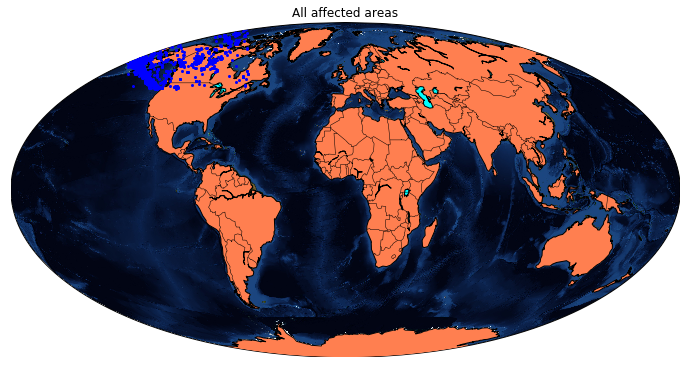

In [21]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m1.plot(x, y, "o", markersize = 2, color = 'blue')
m1.drawcoastlines()
m1.fillcontinents(color='coral',lake_color='aqua')
m1.drawcountries()
m1.bluemarble()
plt.show()

In [24]:
minimum = df['mag'].min()
maximum = df['mag'].max()
average = df['mag'].mean()

print('Minimum:', minimum)
print('Maximum:',maximum)
print('Mean:',average)

Minimum: 4.0
Maximum: 7.93
Mean: 4.514067285965338


In [25]:
df.loc[df['mag']==7.93]

# Google shows an earthquake of 9.2 magnitude in Alaska on March 28, 1964
# But USGS data does not include Alaska data

,latitude,longitude,mag,depth,type,date
7933,35.7,-120.3,7.93,NaN,earthquake,1857-01-09


Magnitude   Number of Occurence
4-5         6724.0
5-6         1032.0
6-7         187.0
7-8         23.0
8-9         0.0
9-10         0.0


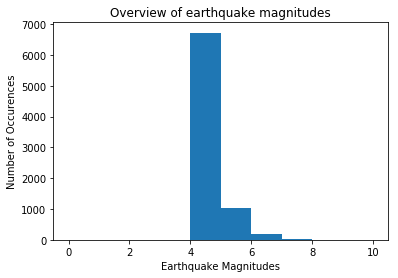

In [27]:
(n,bins, patches) = plt.hist(df['mag'], range=(0,10), bins=10)
plt.xlabel('Earthquake Magnitudes')
plt.ylabel('Number of Occurences')
plt.title('Overview of earthquake magnitudes')

print("Magnitude" +"   "+ "Number of Occurence")
for i in range(4, len(n)):
    print(str(i)+ "-"+str(i+1)+"         " +str(n[i]))
    
# to save
# plt.savefig("occurence.svg", format="svg")


### Heatmap showing earthquake prone regions in the period of 1800 to 2019

In [174]:
from folium.plugins import HeatMap

heat_quake_map = folium.Map(location=[df['latitude'].mean(), 
                                df['longitude'].mean()], 
                                zoom_start=3)
latlons = df[['latitude', 'longitude']].values.tolist()

HeatMap(latlons).add_to(heat_quake_map)
heat_quake_map

# to save
# heat_quake_map.save('analysis.html')

### Map showing the clusters of recorded earthquakes and their locations.

In [157]:
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

quake_map = folium.Map(location=[df['latitude'].mean(), 
                                df['longitude'].mean()], 
                                zoom_start=1)
quake_map.add_child(FastMarkerCluster(df[['latitude', 'longitude']].values.tolist()))

# to save
# quake_map.save('heatmap.html')

quake_map


In [32]:
# Converting date column to datetime format
df['date'] =  pd.to_datetime(df['date'])

# Extracting month from date
df['month'] = df['date'].dt.month

print(df.head())
print(df.dtypes)

    latitude   longitude   mag  depth        type       date  month
0  40.273500 -124.300333  5.58   9.44  earthquake 2019-06-23      6
1  39.219000  -99.430800  4.50   3.00  earthquake 2019-06-22      6
2  30.699500 -114.142000  4.40  10.00  earthquake 2019-06-13      6
3  38.813667 -122.823333  4.07   1.97  earthquake 2019-06-11      6
4  37.469600 -116.695600  4.10  15.90  earthquake 2019-06-11      6
latitude            float64
longitude           float64
mag                 float64
depth               float64
type                 object
date         datetime64[ns]
month                 int64
dtype: object


#### Plot showing types of seismic activities

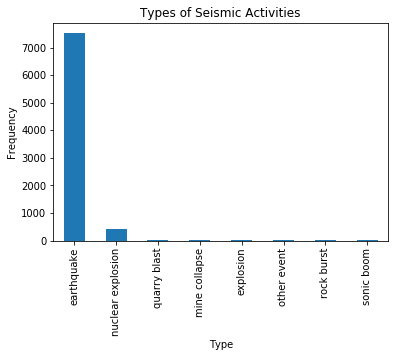

In [33]:
import matplotlib.pyplot as plt

df['type'].value_counts().plot(kind='bar')
plt.title('Types of Seismic Activities')
plt.xlabel('Type')
plt.ylabel('Frequency')

# to save
# plt.savefig("seismic_activities.svg", format="svg")

plt.show()

#### Frequency of Earthquakes by months

In [34]:
Months = df.groupby('month').groups

frequency = []

for i in range(1,13):
    val = Months[i]
    frequency.append(len(val))

print('Number of earthquakes each month:', frequency)
print('Total number of earthquakes:', sum(frequency))

Number of earthquakes each month: [595, 649, 744, 820, 732, 646, 722, 618, 625, 710, 544, 561]
Total number of earthquakes: 7966


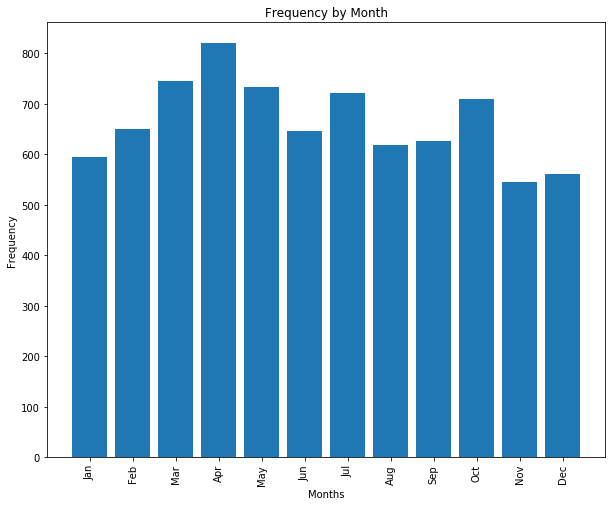

In [36]:
fig, ax = plt.subplots(figsize = (10,8))
bar_positions = np.arange(12)
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
bar_heights = frequency

ax.bar(bar_positions, bar_heights)
tick_positions = np.arange(0,12)
ax.set_xticks(tick_positions)
ax.set_xticklabels(months, rotation = 90)
plt.title('Frequency by Month')
plt.xlabel('Months')
plt.ylabel('Frequency')

# to save
# plt.savefig('Freq_month.svg', format='svg')
plt.show()

In [37]:
df['year'] = df['date'].dt.year

Year with minimum earthquakes 1972
Year with maximum earthquakes 1980
Maximum 550
Minimum 31


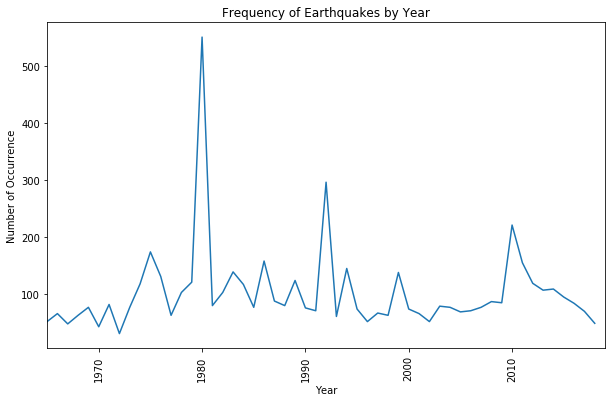

In [61]:
year_occurrence = df.groupby('year').groups

year = [i for i in range(1965,2019)]
occurrence = []

for i in range(len(year)):
    val = year_occurrence[year[i]]
    occurrence.append(len(val))

maximum = max(occurrence)
minimum = min(occurrence)

for i in range(len(year)):
    if(len(year_occurrence[year[i]]) == maximum):
        print("Year with maximum earthquakes", year[i])
    
    elif(len(year_occurrence[year[i]]) == minimum):
        print("Year with minimum earthquakes", year[i])
    

print("Maximum",maximum)
print("Minimum",minimum)

fig = plt.figure(figsize=(10,6))
plt.plot(year,occurrence)
plt.xticks(rotation = 90)
plt.xlabel("Year")
plt.ylabel("Number of Occurrence")
plt.title("Frequency of Earthquakes by Year")
plt.xlim(1965,2019)

# to save
# plt.savefig('Freq_by_year.svg', format='svg')

plt.show()

## Correlation between depth and magnitude

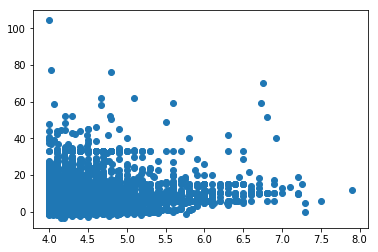

In [43]:
plt.scatter(df['mag'],df['depth']);

In [44]:
df.isna().sum()

latitude       0
longitude      0
mag            0
depth        801
type           0
date           0
month          0
year           0
dtype: int64

In [45]:
# Dropping NaNs

quake = df.dropna()
quake.isna().sum()

latitude     0
longitude    0
mag          0
depth        0
type         0
date         0
month        0
year         0
dtype: int64

### Linear Regression

In [46]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

X = quake['depth'].values[1:1000]
y = quake['mag'].values[1:1000]

#### Since sklearn does not accept 1-d arrays, reshaping the data to matrix form with 1 column and n rows.

In [48]:
X1 = X.reshape(len(X),1)
y1 = y.reshape(len(y),1)

In [49]:
lr = linear_model.LinearRegression()
lr.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
# for every value of X, value of Y is predicted
y_pred = lr.predict(X1)

#### Mean Squared Error

In [52]:
print("Mean squared error: %.2f"
      % np.mean((y_pred - y1) ** 2))

Mean squared error: 0.17


#### Plot shows that Magnitude and Depth have a non-linear relationship.

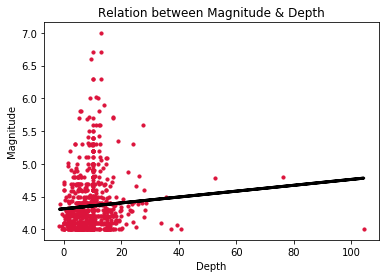

In [59]:
plt.scatter(X1, y1, s = 10 ,color='crimson')
plt.plot(X1, y_pred, color='black',
         linewidth=3)

plt.xlabel("Depth")
plt.ylabel("Magnitude")
plt.title("Relation between Magnitude & Depth")

# to save
# plt.savefig('relationship.svg', format='svg')

plt.show()
